In [109]:
# Import Relevant Modules
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read in the data file and view the first 5 observations
df = pd.read_csv('iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
# Map the Iris species to the encoding
df['y_encoded'] = df['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 1
})

# Label the independent variables (attributes of the species) as X, and the Species, dependent variable, as Y
X = df['SepalWidthCm']
Y = df['y_encoded']


#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


<class 'pandas.core.series.Series'>


In [120]:
#Reshape the data
reshape_func = lambda col: col.values.reshape(-1, 1)

X_train = reshape_func(X_train)
X_test = reshape_func(X_test)
ytrain = reshape_func(y_train)
y_test = reshape_func(y_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Confusion Matrix:
 [[ 5  5]
 [ 1 19]]


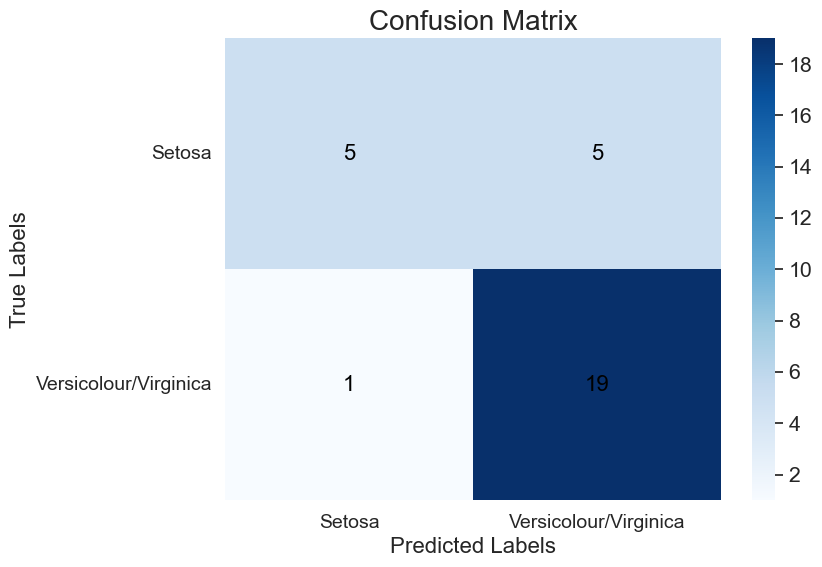

In [122]:
# Need to make sure the y test and prediction data is in a numpy array
y_test= np.array(y_test)
y_pred = np.array(y_pred)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


# Plot confusion matrix with adjusted font size and figure size
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=True)

# Manually annotate the heatmap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, cm[i, j],
                ha='center', va='center', color='black', fontsize=16)

plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.xticks(ticks=[0.5, 1.5], labels=['Setosa', 'Versicolour/Virginica'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['Setosa', 'Versicolour/Virginica'], fontsize=14, rotation=0)

plt.show()

In [125]:
# Repeat to make this a three class problem , first change the mapping and repeat every step
# Map the Iris species to the new encoding
df['y_encoded'] = df['Species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

# Label the independent variables (attributes of the species) as X, and the Species, dependent variable, as Y
X = df['SepalWidthCm']
Y = df['y_encoded']

#Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [126]:
# Reshape the data 

X_train = reshape_func(X_train)
X_test = reshape_func(X_test)
ytrain = reshape_func(y_train)
y_test = reshape_func(y_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Confusion Matrix:
 [[6 0 4]
 [1 8 0]
 [3 4 4]]


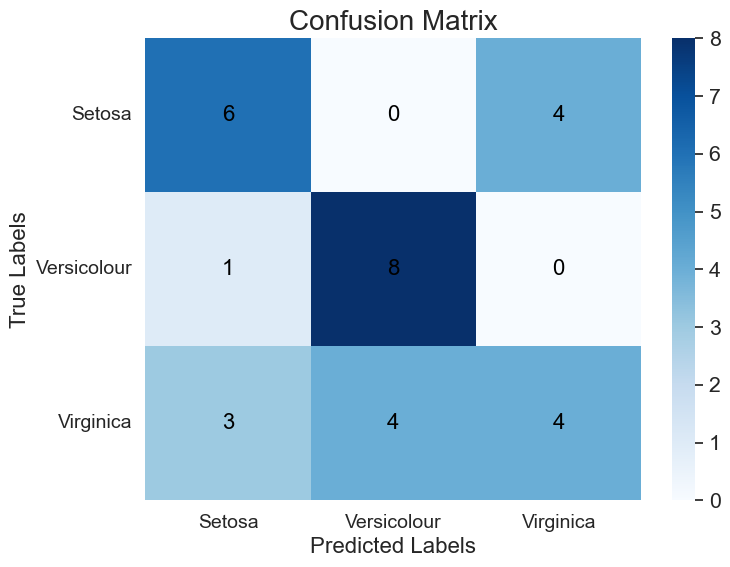

In [127]:
# Need to make sure the y test and prediction data is in a numpy array
y_test= np.array(y_test)
y_pred = np.array(y_pred)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


# Plot confusion matrix with adjusted font size and figure size
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', cbar=True)

# Manually annotate the heatmap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j + 0.5, i + 0.5, cm[i, j],
                ha='center', va='center', color='black', fontsize=16)

plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.xticks(ticks=[0.5, 1.5,2.5], labels=['Setosa', 'Versicolour','Virginica'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5,2.5], labels=['Setosa', 'Versicolour', 'Virginica'], fontsize=14, rotation=0)

plt.show()

Now that this is a three class problem we can see the split in the confusion matrix between Versicolor and Virginica predictions.  

Going from bottom to top for versicolor: 
There are 4 false positives for versicolor and virginica
There are 8 true positives for versicolor
there are 0 false positives for versicolor and setosa

Going from left to right for versicolor:
There is 1 false negative for verisicolor and setosa
There are 8 true positives
There are no false negatives for versicolor and virginica

Going from bottom to top for virginica:
There are 4 true positives
There are 0 false positives for virginica and versicolor
There are 4 true negatives for virginica and setosa

Going from left to right for virginica:
There are 3 false negatives for virginica and setosa
There are false negatives for virginica and versicolor
There are 4 true positives

Precision is the proportion of predictions of the positive class that is correct : precision = TP/TP + FP
Recall is a measure of how many instances of a class the model was able to recognise: recall = TP/TP + FN

I need to see the difference between FP and FN to predict. If FP > FN then recall is better and vice versa. For each instance there are 4+4+4 = 12 FP and 4+1+7=12 FN. Since FP  = FN they should be the same

In [148]:

# Initialize the components of the confusion matrix
TP = [0, 0, 0]  # True Positives for each class
FP = [0, 0, 0]  # False Positives for each class
FN = [0, 0, 0]  # False Negatives for each class
TN = [0, 0, 0]  # True Negatives for each class

# Calculate the confusion matrix components
for true_label, predicted_label in zip(y_test, y_pred):
    for i in range(3):  # Assuming 3 classes
        if true_label == i and predicted_label == i:
            TP[i] += 1
        elif true_label == i and predicted_label != i:
            FN[i] += 1
        elif true_label != i and predicted_label == i:
            FP[i] += 1
        else:
            TN[i] += 1
            
#Sum up the list elements so they can be used in further calculations
TP = sum(TP)
FP= sum(FP)
FN= sum(FN)
TN = sum(TN)
            

#Calculate accuracy
accuracy = ((TP + TN) / (TP + TN + FP + FN))*100


# Calculate precision
if (TP + FP) > 0:
    precision = (TP / (TP + FP))*100
else:
    precision = 0  # Avoid division by zero

# Calculate recall
if (TP + FP) > 0:
    recall = (TP / (TP + FN))*100
else:
    recall = 0  # Avoid division by zero

print(f'Accuracy: {accuracy:.2f}%')    
print(f'Precision: {precision:.2f}%')
print(f'Recall: {recall:.2f}%')
print(TP, FP, FN)

#We see precision and recall  are the same

Accuracy: 73.33%
Precision: 60.00%
Recall: 60.00%
18 12 12
